In [1]:
%pip install pandas scipy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('c:\\Users\\konet\\Downloads\\archive (3)\\measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


<Axes: xlabel='profile_id'>

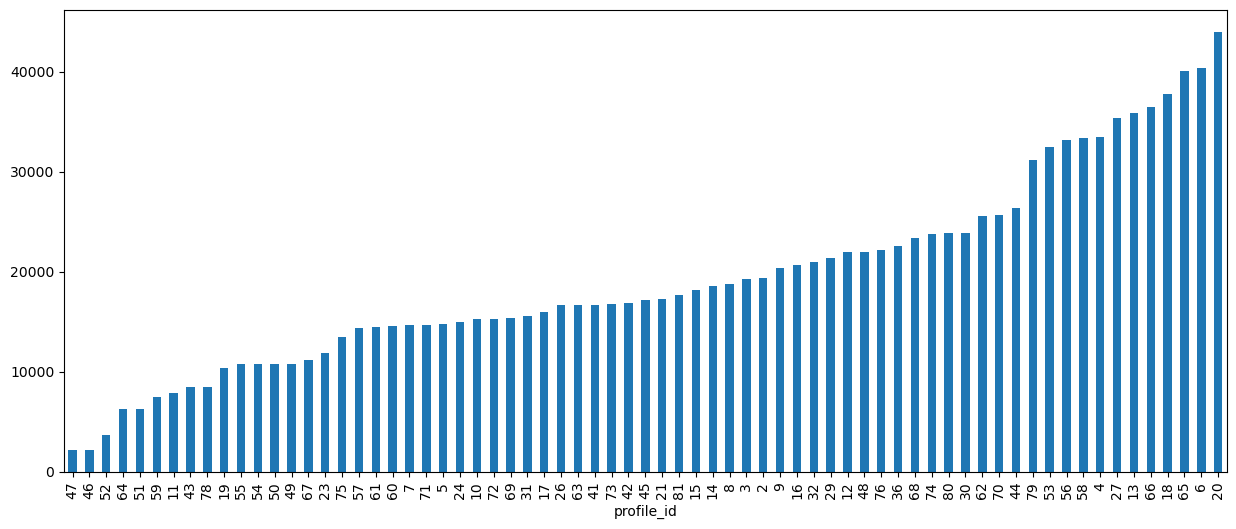

In [4]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

In [5]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

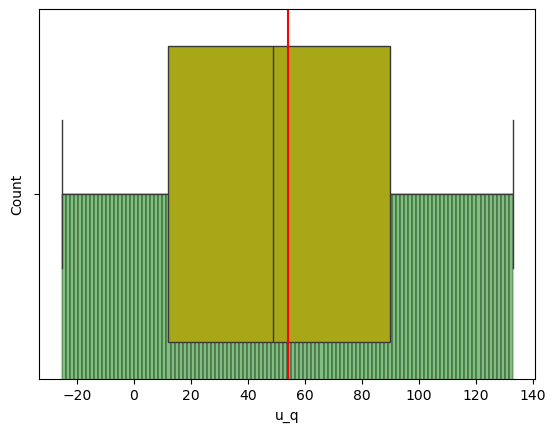

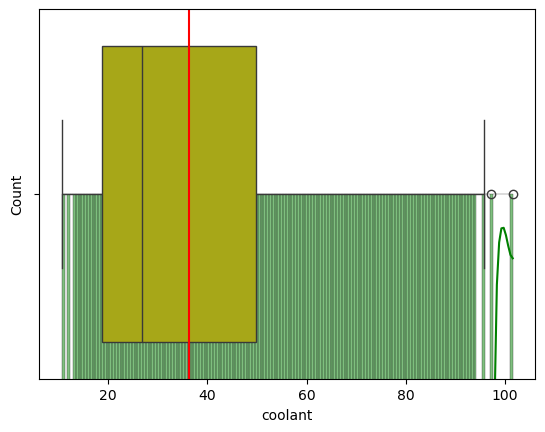

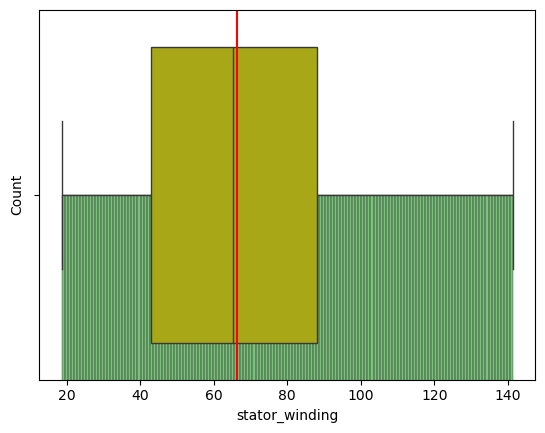

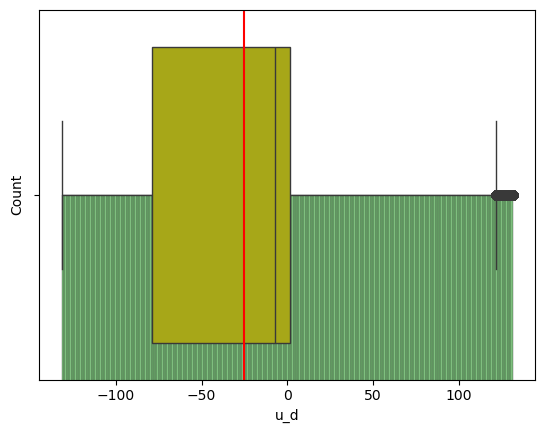

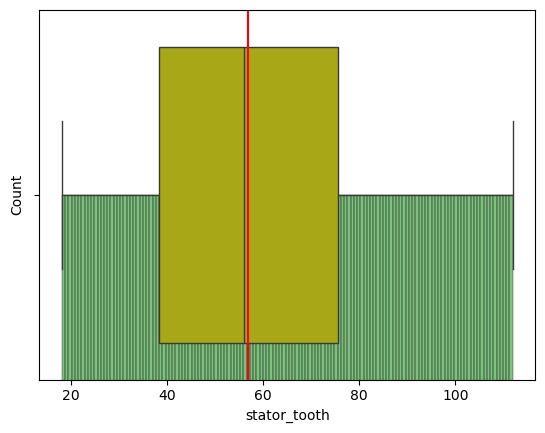

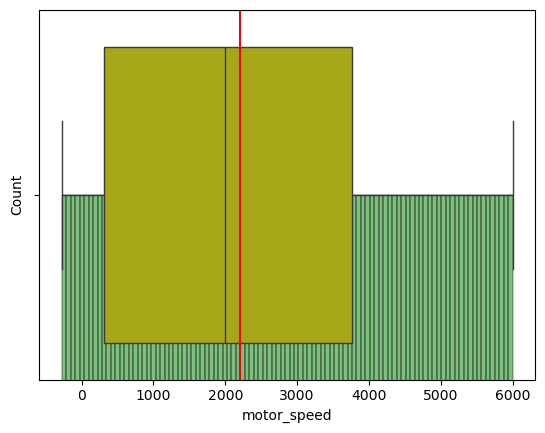

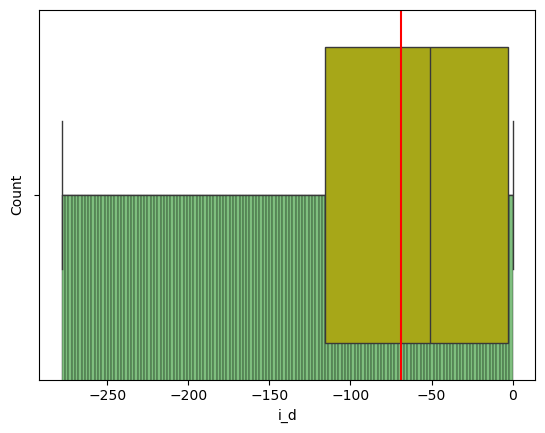

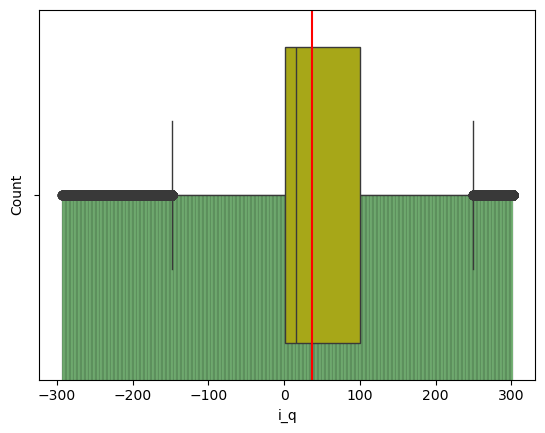

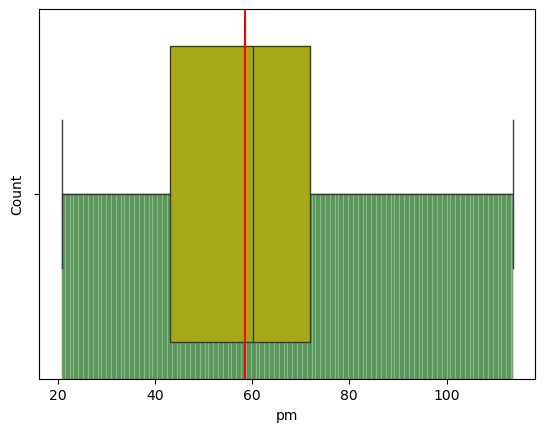

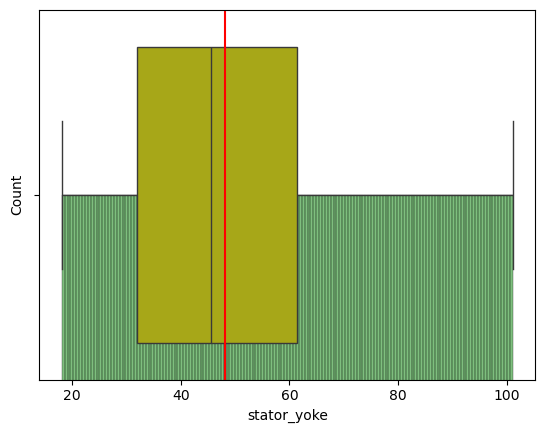

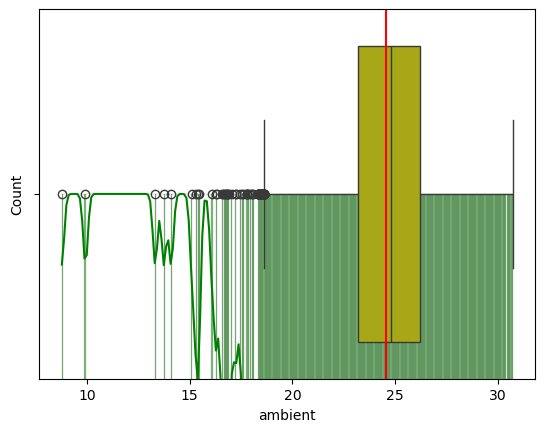

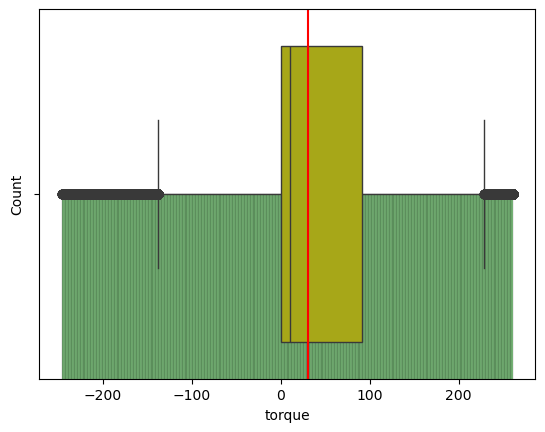

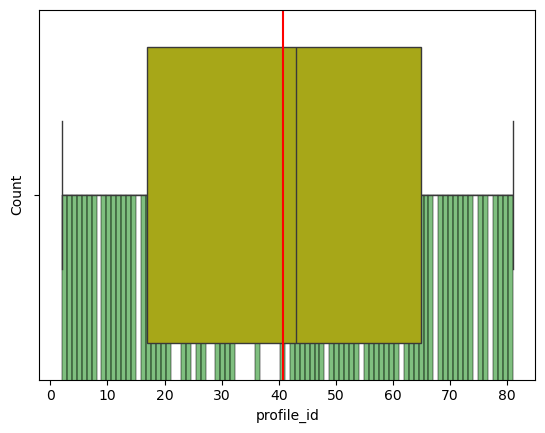

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.histplot(df[col], color='g', kde=True)
    sns.boxplot(x=df[col], color='y')
    plt.axvline(df[col].mean(), color='r')  # mean line
    plt.show()


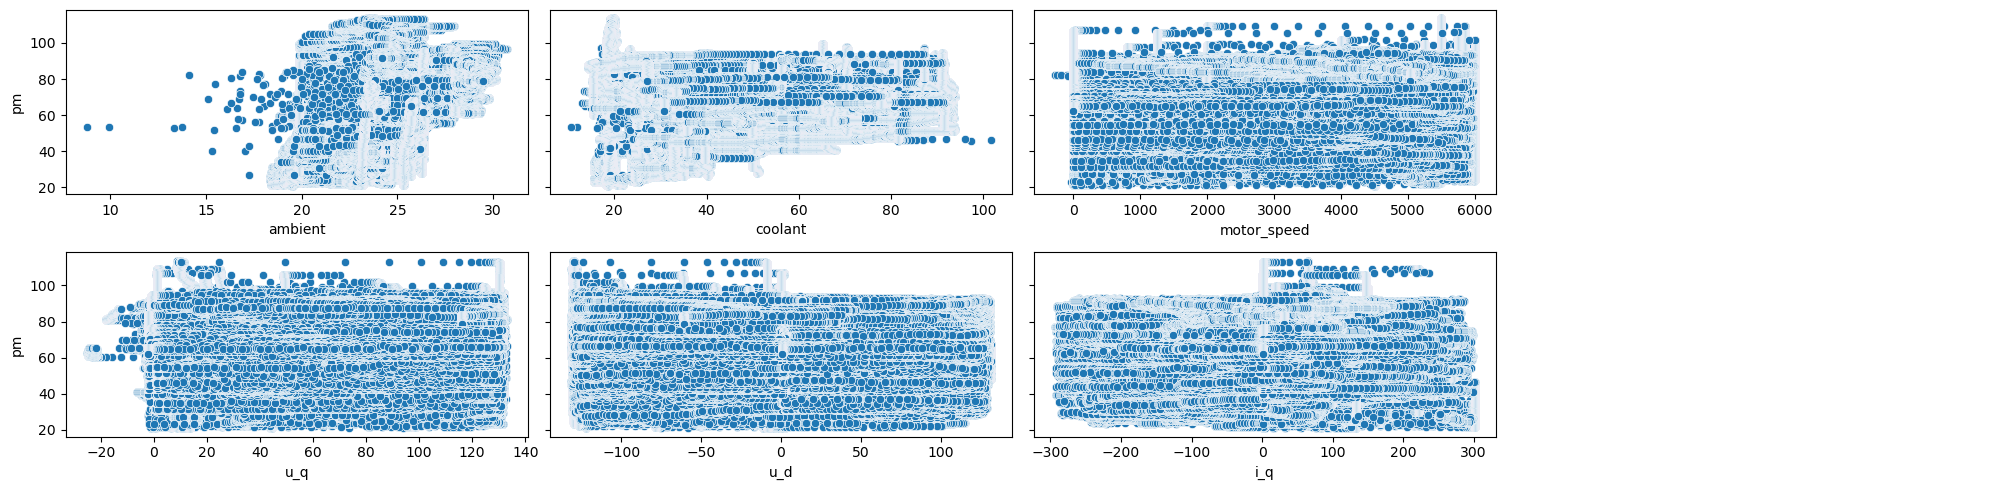

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20, 5), sharey=True)

sns.scatterplot(x='ambient', y='pm', data=df, ax=axes[0][0])
sns.scatterplot(x='coolant', y='pm', data=df, ax=axes[0][1])
sns.scatterplot(x='motor_speed', y='pm', data=df, ax=axes[0][2])

axes[0][3].axis('off')  # turn off id plot

sns.scatterplot(x='u_q', y='pm', data=df, ax=axes[1][0])
sns.scatterplot(x='u_d', y='pm', data=df, ax=axes[1][1])
sns.scatterplot(x='i_q', y='pm', data=df, ax=axes[1][2])

axes[1][3].axis('off')

plt.tight_layout()
plt.show()


<Axes: >

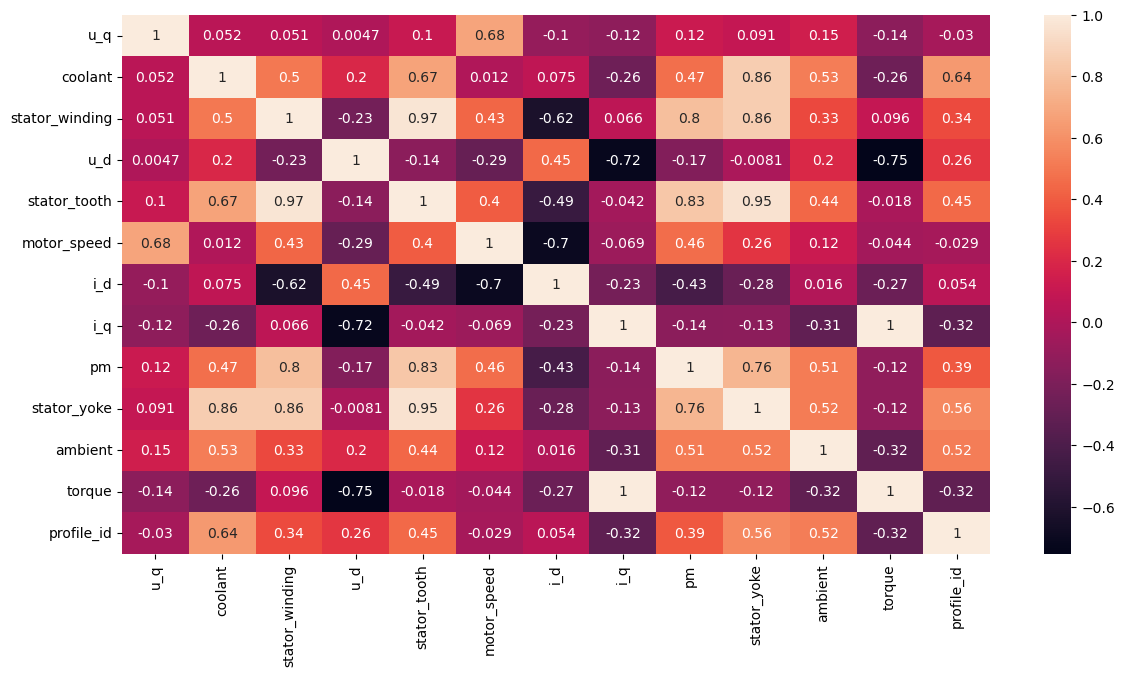

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

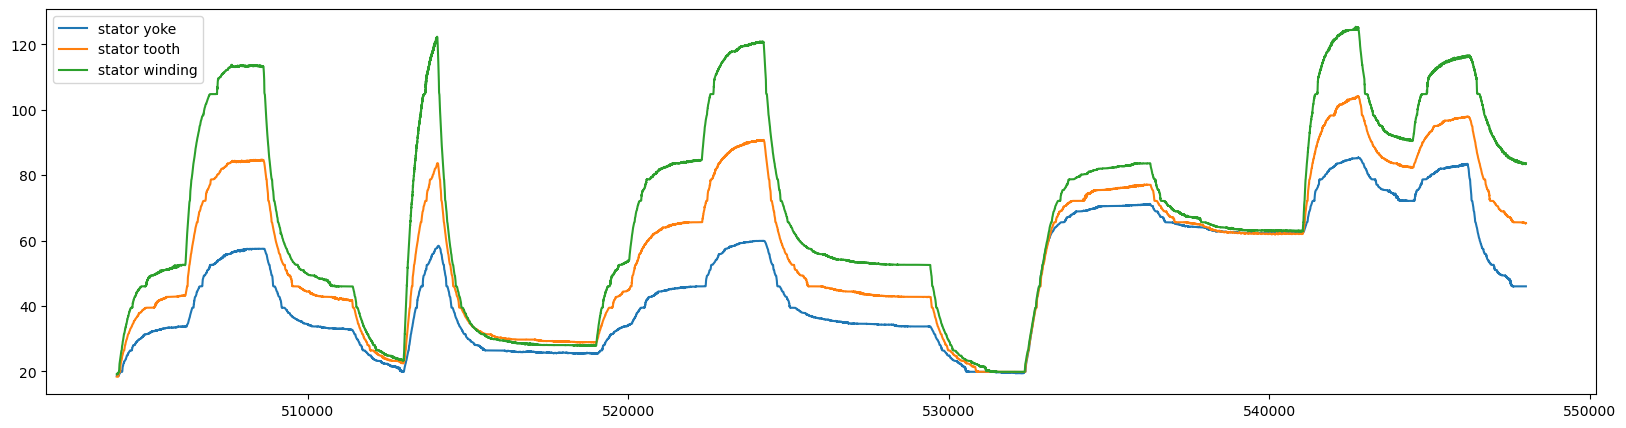

In [9]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df[ 'profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend();

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['profile_id'], axis=1, errors='ignore')
y = df['pm']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [13]:
df.drop(['stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)

,u_q,coolant,u_d,motor_speed,i_d,i_q,pm,ambient,profile_id
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,24.554214,19.850691,17
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,24.538078,19.850672,17
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,24.544693,19.850657,17
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,24.554018,19.850647,17
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,24.565397,19.850639,17
...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,0.791801,0.000380,-2.000169,1.097528,62.147780,23.989078,71
1330812,-2.258684,30.721306,0.778900,0.002985,-2.000499,1.097569,62.142646,23.970700,71
1330813,-2.130312,30.721312,0.804914,0.002301,-1.999268,1.098765,62.138387,23.977234,71
1330814,-2.268498,30.721316,0.763091,0.005662,-2.000999,1.095696,62.133422,24.001421,71


In [14]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)


In [16]:
import joblib
joblib.dump(mm,'transform.save')

['transform.save']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
# ================== IMPORTS ==================

import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Preprocessing & split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
}


In [20]:
models = {
    "Ridge": Ridge(),

    "DecisionTree": DecisionTreeRegressor(
        max_depth=10
    ),

    "AdaBoost": AdaBoostRegressor(
        n_estimators=30,
        random_state=42
    ),
    "Bagging": BaggingRegressor(
        n_estimators=30,
        n_jobs=-1,
        random_state=42
    )
}


In [21]:
X_small = X_train[:2000]
y_small = y_train[:2000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

scores = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_small, y_small)
    scores.append(r2_score(y_test_small, model.predict(X_test_small)))


Training Ridge...
Training DecisionTree...
Training AdaBoost...
Training Bagging...


In [22]:
print("X_train shape:", X_train.shape)

X_train shape: (931571, 12)


In [23]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import r2_score

models = {
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(max_depth=10),
    "AdaBoost": AdaBoostRegressor(
        n_estimators=30,
        random_state=42
    ),
    "Bagging": BaggingRegressor(
        n_estimators=30,
        n_jobs=-1,
        random_state=42
    )
}

# Small subset for fast execution
X_small = X_train[:2000]
y_small = y_train[:2000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

scores = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_small, y_small)
    score = r2_score(y_test_small, model.predict(X_test_small))
    scores.append(score)
    print(f"{name} R2 Score: {score:.4f}")


Training Ridge...
Ridge R2 Score: 1.0000
Training DecisionTree...
DecisionTree R2 Score: 0.9999
Training AdaBoost...
AdaBoost R2 Score: 0.9950
Training Bagging...
Bagging R2 Score: 1.0000


In [24]:
from sklearn import metrics

In [25]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

model1 = Ridge()
model3 = AdaBoostRegressor(n_estimators=10, random_state=42)

# 🔥 use SMALL dataset
X_small = X_train[:2000]
y_small = y_train[:2000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

model1.fit(X_small, y_small)
model3.fit(X_small, y_small)

p1 = model1.predict(X_test_small)
p3 = model3.predict(X_test_small)

print("Ridge R2:", r2_score(y_test_small, p1))
print("AdaBoost R2:", r2_score(y_test_small, p3))


Ridge R2: 0.9999999999844973
AdaBoost R2: 0.9924721683091232


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test_small, p1))

5.435409130671985e-09


In [28]:
import joblib

In [29]:
import joblib

joblib.dump(model1, "ridge_model.joblib")

['ridge_model.joblib']

In [30]:
from sklearn.tree import DecisionTreeRegressor
import joblib

# Re-create model (same params as training)
Decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fit again (safe & fast)
Decision_tree.fit(X_train, y_train)

# Save model & scaler
joblib.dump(Decision_tree, "model.save")
joblib.dump(mm, "transform.save")

print("model.save and transform.save created successfully")


model.save and transform.save created successfully


In [31]:
import os
print(os.getcwd())

c:\Users\konet\OneDrive\Desktop\Laddu\Training


In [32]:
import joblib
import os

# choose best trained model
best_model = Decision_tree   # or Linear_reg / Svr

# target folder
save_dir = r"C:\Users\konet\OneDrive\Desktop\Laddu"
os.makedirs(save_dir, exist_ok=True)

# full paths
model_path = os.path.join(save_dir, "model.save")
scaler_path = os.path.join(save_dir, "transform.save")

# save
joblib.dump(best_model, model_path)
joblib.dump(mm, scaler_path)

print("Files saved successfully:")
print(model_path)
print(scaler_path)


Files saved successfully:
C:\Users\konet\OneDrive\Desktop\Laddu\model.save
C:\Users\konet\OneDrive\Desktop\Laddu\transform.save


In [33]:
import joblib

model = joblib.load("model.save")
scaler = joblib.load("transform.save")

print(model)
print(scaler)


DecisionTreeRegressor(max_depth=10, random_state=42)
MinMaxScaler()


In [34]:
sample = X_test[:1]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Prediction:", prediction)


Prediction: [21.14007317]
